In [1]:
#Import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import os
from sklearn import datasets
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Import the data and describe
life = pd.read_csv('Life_Expectancy.csv')
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
life.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [4]:
life.shape

(2938, 22)

In [5]:
#Cleaning the column titles
orig_cols = list(life.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
life.columns = new_cols

In [6]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

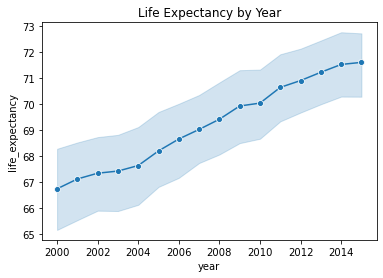

In [7]:
#Line chart showing life expectancy by year
sns.lineplot('year', 'life_expectancy', data=life, marker='o')
plt.title('Life Expectancy by Year')
plt.show()

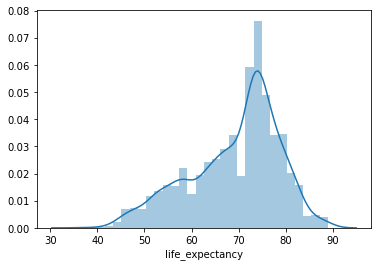

In [8]:
#Average age of life expectancy
sns.distplot(life['life_expectancy']);

In [9]:
mort_5_percentile = np.percentile(life.adult_mortality.dropna(), 5)
life.adult_mortality = life.apply(lambda x: np.nan if x.adult_mortality < mort_5_percentile else x.adult_mortality, axis=1)
life.bmi = life.apply(lambda x: np.nan if (x.bmi < 10 or x.bmi > 50) else x.bmi, axis=1)
life['under-five_deaths'] =life['under-five_deaths'].replace(0, np.nan)

In [10]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2783 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              1482 non-null   float64
 11  under-five_deaths                2153 non-null   float64
 12  polio               

In [11]:
def nulls_breakdown(life=life):
    life_cols = list(life.columns)
    cols_total_count = len(list(life.columns))
    cols_count = 0
    for loc, col in enumerate(life_cols):
        null_count = life[col].isnull().sum()
        total_count = life[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values; {}% columns contain null values.'.format(cols_total_count, cols_count, cols_percent_null))

In [12]:
nulls_breakdown()

[iloc = 3] life_expectancy has 10 null values: 0.34% null
[iloc = 4] adult_mortality has 155 null values: 5.28% null
[iloc = 6] alcohol has 194 null values: 6.6% null
[iloc = 8] hepatitis_b has 553 null values: 18.82% null
[iloc = 10] bmi has 1456 null values: 49.56% null
[iloc = 11] under-five_deaths has 785 null values: 26.72% null
[iloc = 12] polio has 19 null values: 0.65% null
[iloc = 13] total_expenditure has 226 null values: 7.69% null
[iloc = 14] diphtheria has 19 null values: 0.65% null
[iloc = 16] gdp has 448 null values: 15.25% null
[iloc = 17] population has 652 null values: 22.19% null
[iloc = 18] thinness_1-19_years has 34 null values: 1.16% null
[iloc = 19] thinness_5-9_years has 34 null values: 1.16% null
[iloc = 20] income_composition_of_resources has 167 null values: 5.68% null
[iloc = 21] schooling has 163 null values: 5.55% null
Out of 22 total columns, 15 contain null values; 68.18% columns contain null values.


In [13]:
life.drop(columns='bmi', inplace=True)

In [14]:
life.drop(columns = ['infant_deaths', 'thinness_5-9_years', 'polio'], inplace =True)

In [15]:
#Cleaning the column titles
orig_cols = list(life.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
life.columns = new_cols

In [16]:
imputed_data = []
for year in list(life.year.unique()):
    year_data = life[life.year == year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
    imputed_data.append(year_data)
life = pd.concat(imputed_data).copy()

In [17]:
#missing values
def missing_values(life):
    missing=pd.DataFrame(life.isnull().sum()/len(life))*100
    missing.columns = ['missing_values(%)']
    missing['missing_values(numbers)'] = pd.DataFrame(life.isnull().sum())
    return missing.sort_values(by='missing_values(%)', ascending=False)
missing_values(life)

,missing_values(%),missing_values(numbers)
country,0.0,0
year,0.0,0
income_composition_of_resources,0.0,0
thinness_1-19_years,0.0,0
population,0.0,0
gdp,0.0,0
hiv/aids,0.0,0
diphtheria,0.0,0
total_expenditure,0.0,0
under-five_deaths,0.0,0


In [18]:
nulls_breakdown(life)

Out of 18 total columns, 0 contain null values; 0.0% columns contain null values.


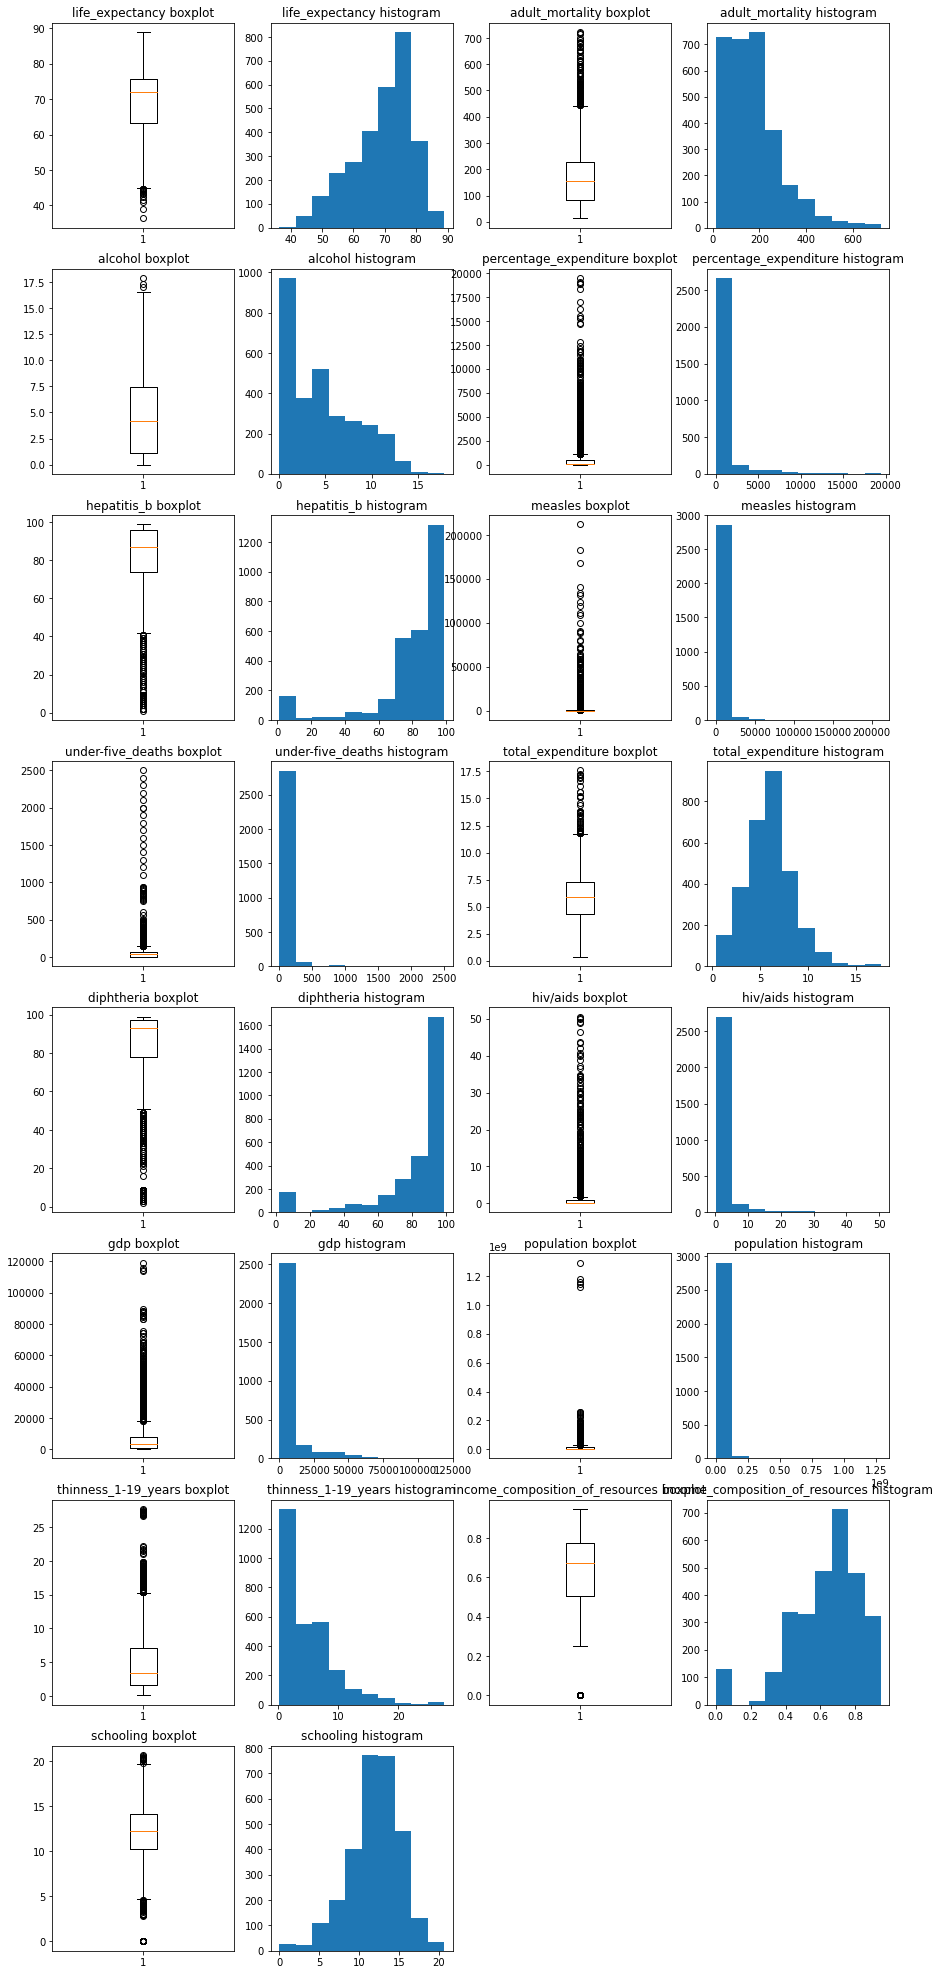

In [19]:
#Box plots and histogram charts to show outliers and errors
cont_vars = list(life.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
    plt.show()
outliers_visual(life)

In [20]:
#Function to detect the outliers per column
def outlier_count(col, data=life):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [21]:
for col in cont_vars:
    outlier_count(col)

---------------life_expectancy---------------
Number of outliers: 17
Percent of data that is outlier: 0.58%
---------------adult_mortality---------------
Number of outliers: 97
Percent of data that is outlier: 3.3%
---------------alcohol---------------
Number of outliers: 3
Percent of data that is outlier: 0.1%
---------------percentage_expenditure---------------
Number of outliers: 389
Percent of data that is outlier: 13.24%
---------------hepatitis_b---------------
Number of outliers: 222
Percent of data that is outlier: 7.56%
---------------measles---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
---------------under-five_deaths---------------
Number of outliers: 142
Percent of data that is outlier: 4.83%
---------------total_expenditure---------------
Number of outliers: 51
Percent of data that is outlier: 1.74%
---------------diphtheria---------------
Number of outliers: 298
Percent of data that is outlier: 10.14%
---------------hiv/aids--------------

In [22]:
#Scipy to winzorize data to stop it becoming distorted
from scipy.stats.mstats import winsorize
def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(life[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(life[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

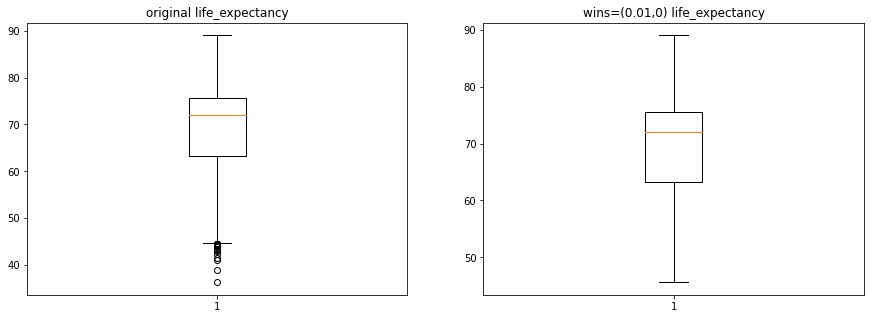

In [23]:
#Stored in a dictionary to be used when needed
wins_dict = {}
test_wins(cont_vars[0], lower_limit=.01, show_plot=True)
test_wins(cont_vars[1], upper_limit=.04, show_plot=False)
test_wins(cont_vars[2], upper_limit=.05, show_plot=False)
test_wins(cont_vars[3], upper_limit=.0025, show_plot=False)
test_wins(cont_vars[4], upper_limit=.135, show_plot=False)
test_wins(cont_vars[5], lower_limit=.1, show_plot=False)
test_wins(cont_vars[6], upper_limit=.19, show_plot=False)
test_wins(cont_vars[7], upper_limit=.05, show_plot=False)
test_wins(cont_vars[8], lower_limit=.1, show_plot=False)
test_wins(cont_vars[9], upper_limit=.02, show_plot=False)
test_wins(cont_vars[10], lower_limit=.105, show_plot=False)
test_wins(cont_vars[11], upper_limit=.185, show_plot=False)
test_wins(cont_vars[12], upper_limit=.105, show_plot=False)
test_wins(cont_vars[13], upper_limit=.07, show_plot=False)
test_wins(cont_vars[14], upper_limit=.035, show_plot=False)


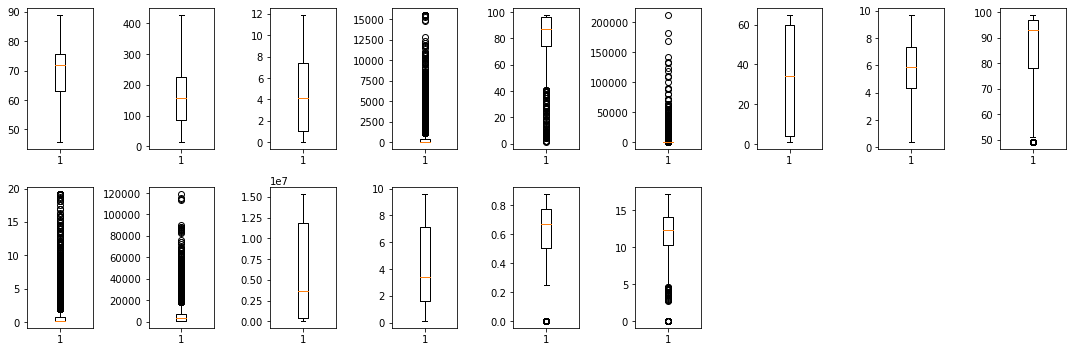

In [24]:
#Box plots to show the winsorised data
plt.figure(figsize=(15,5))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(2, 9, i)
    plt.boxplot(wins_dict[col])
plt.tight_layout()
plt.show()

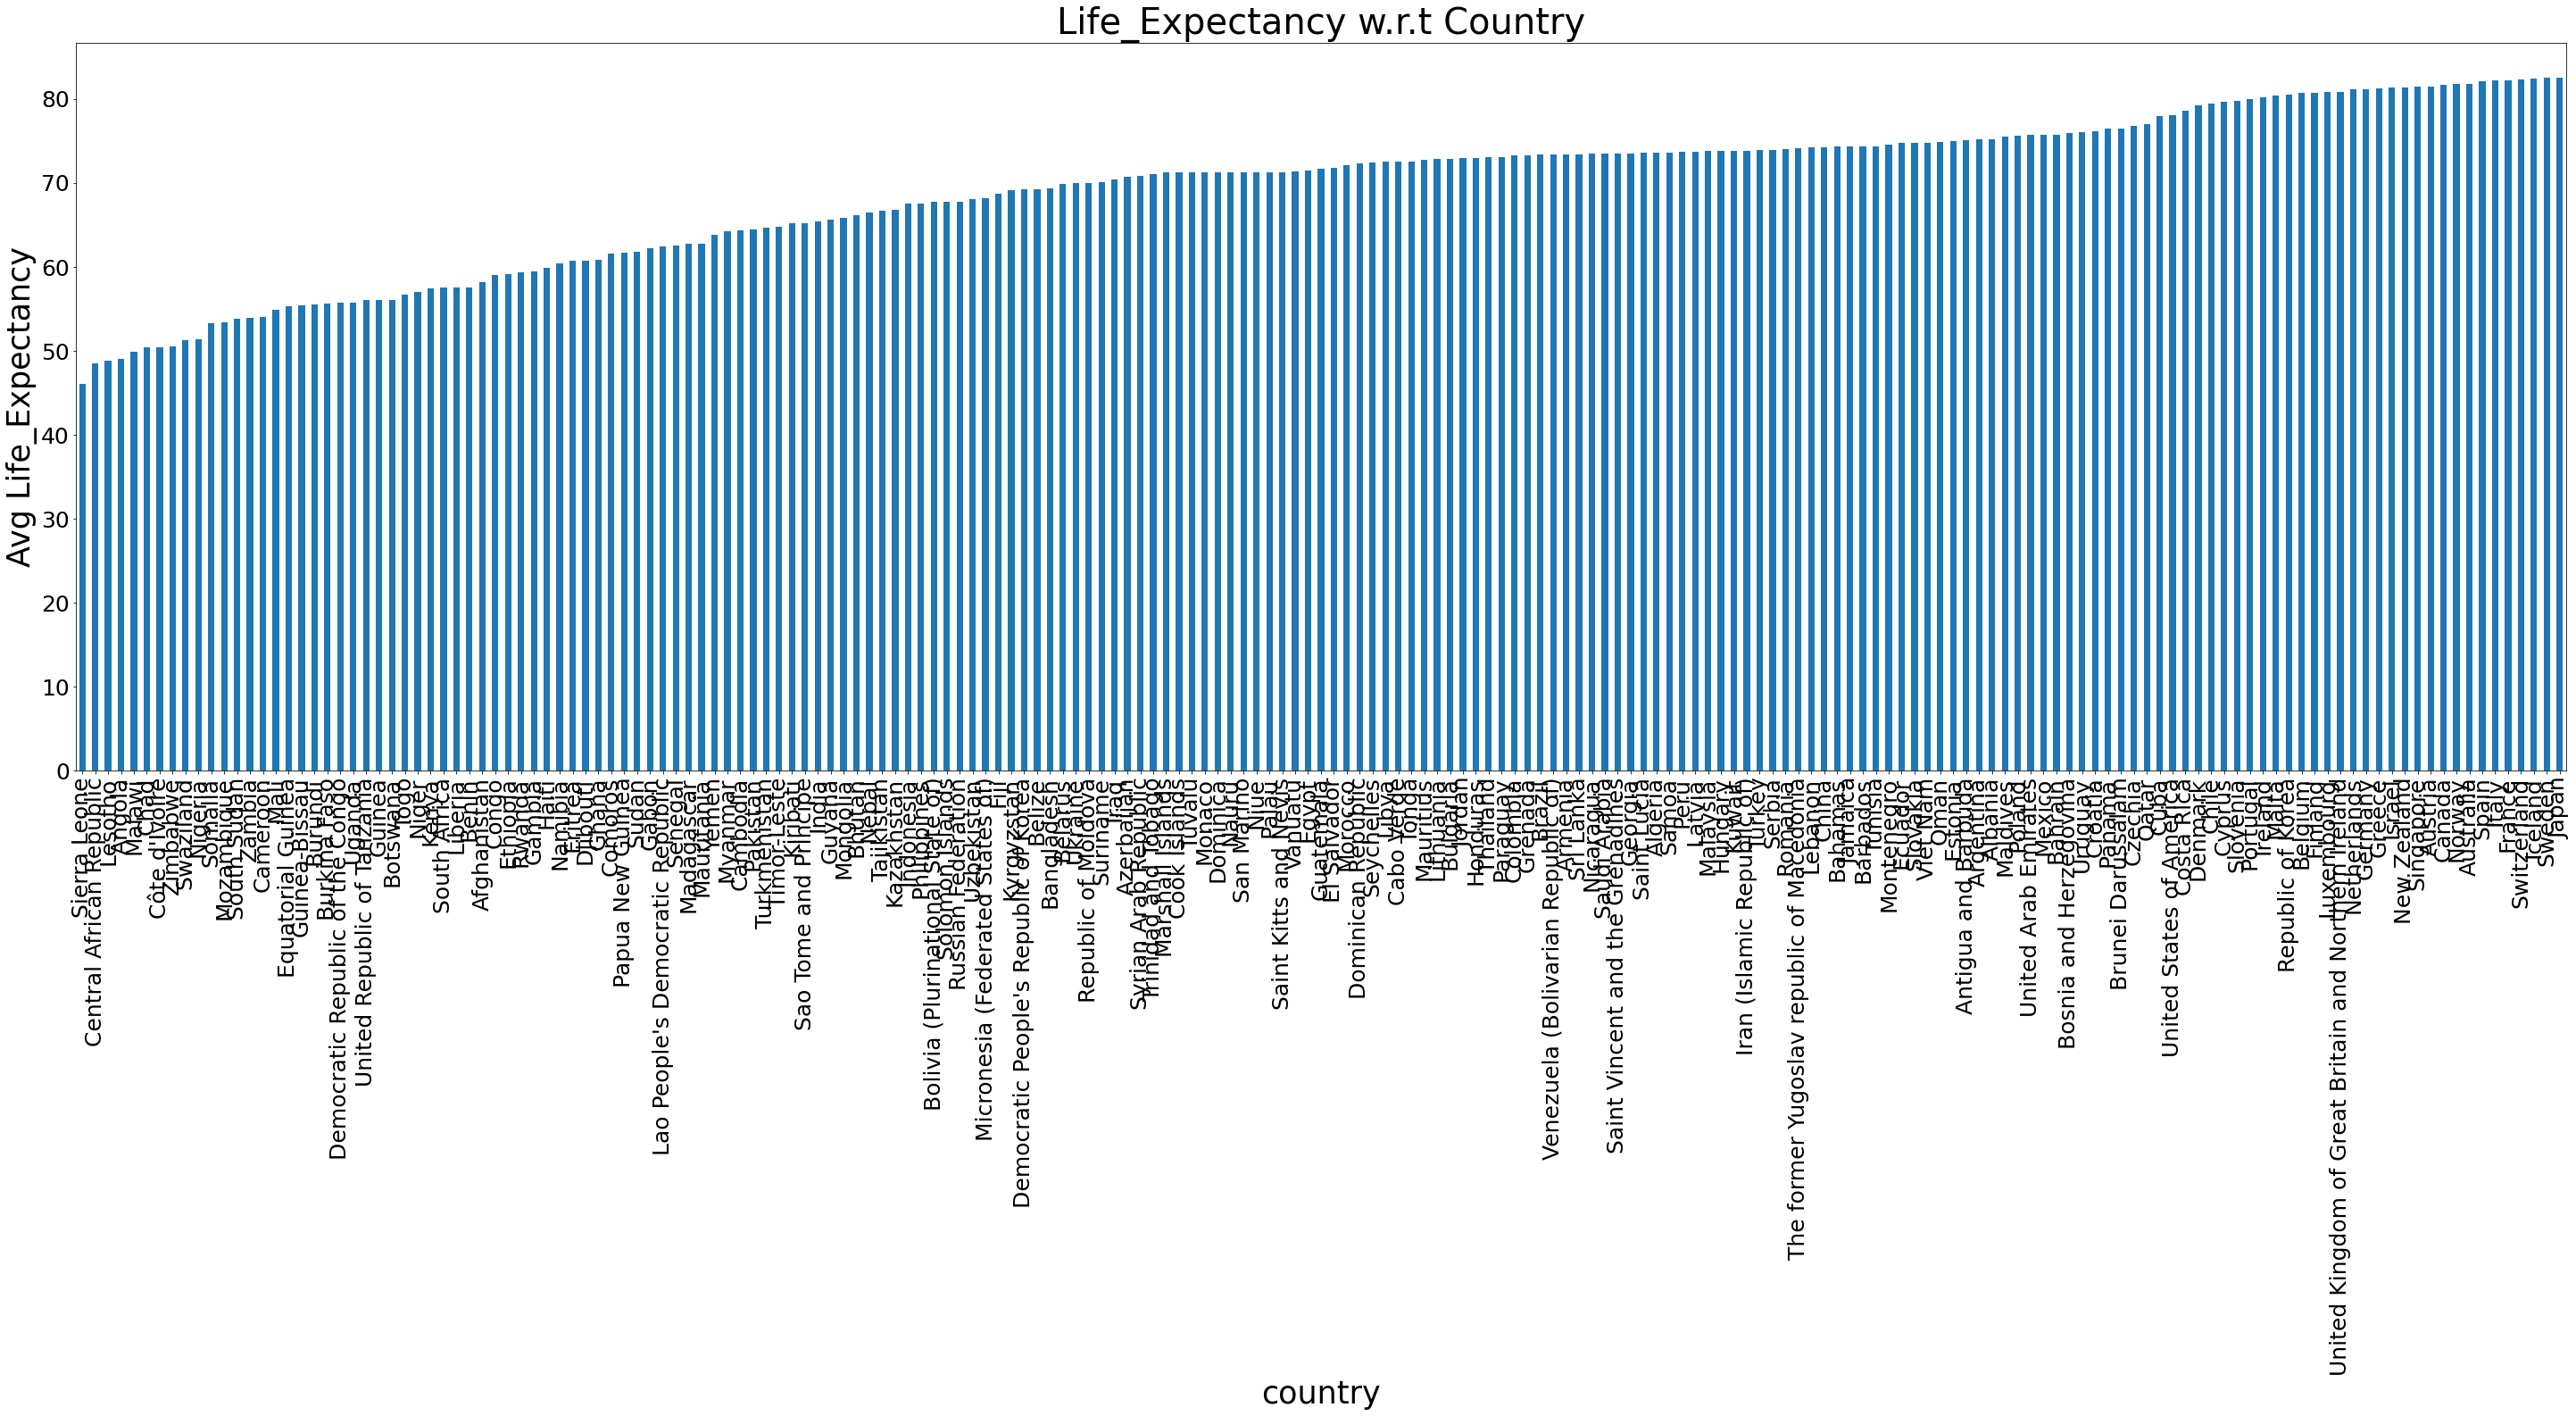

In [25]:
#Bar chart to show all countries average life expectancy
le_country = life.groupby('country')['life_expectancy'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Life_Expectancy w.r.t Country",fontsize=40)
plt.xlabel("country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

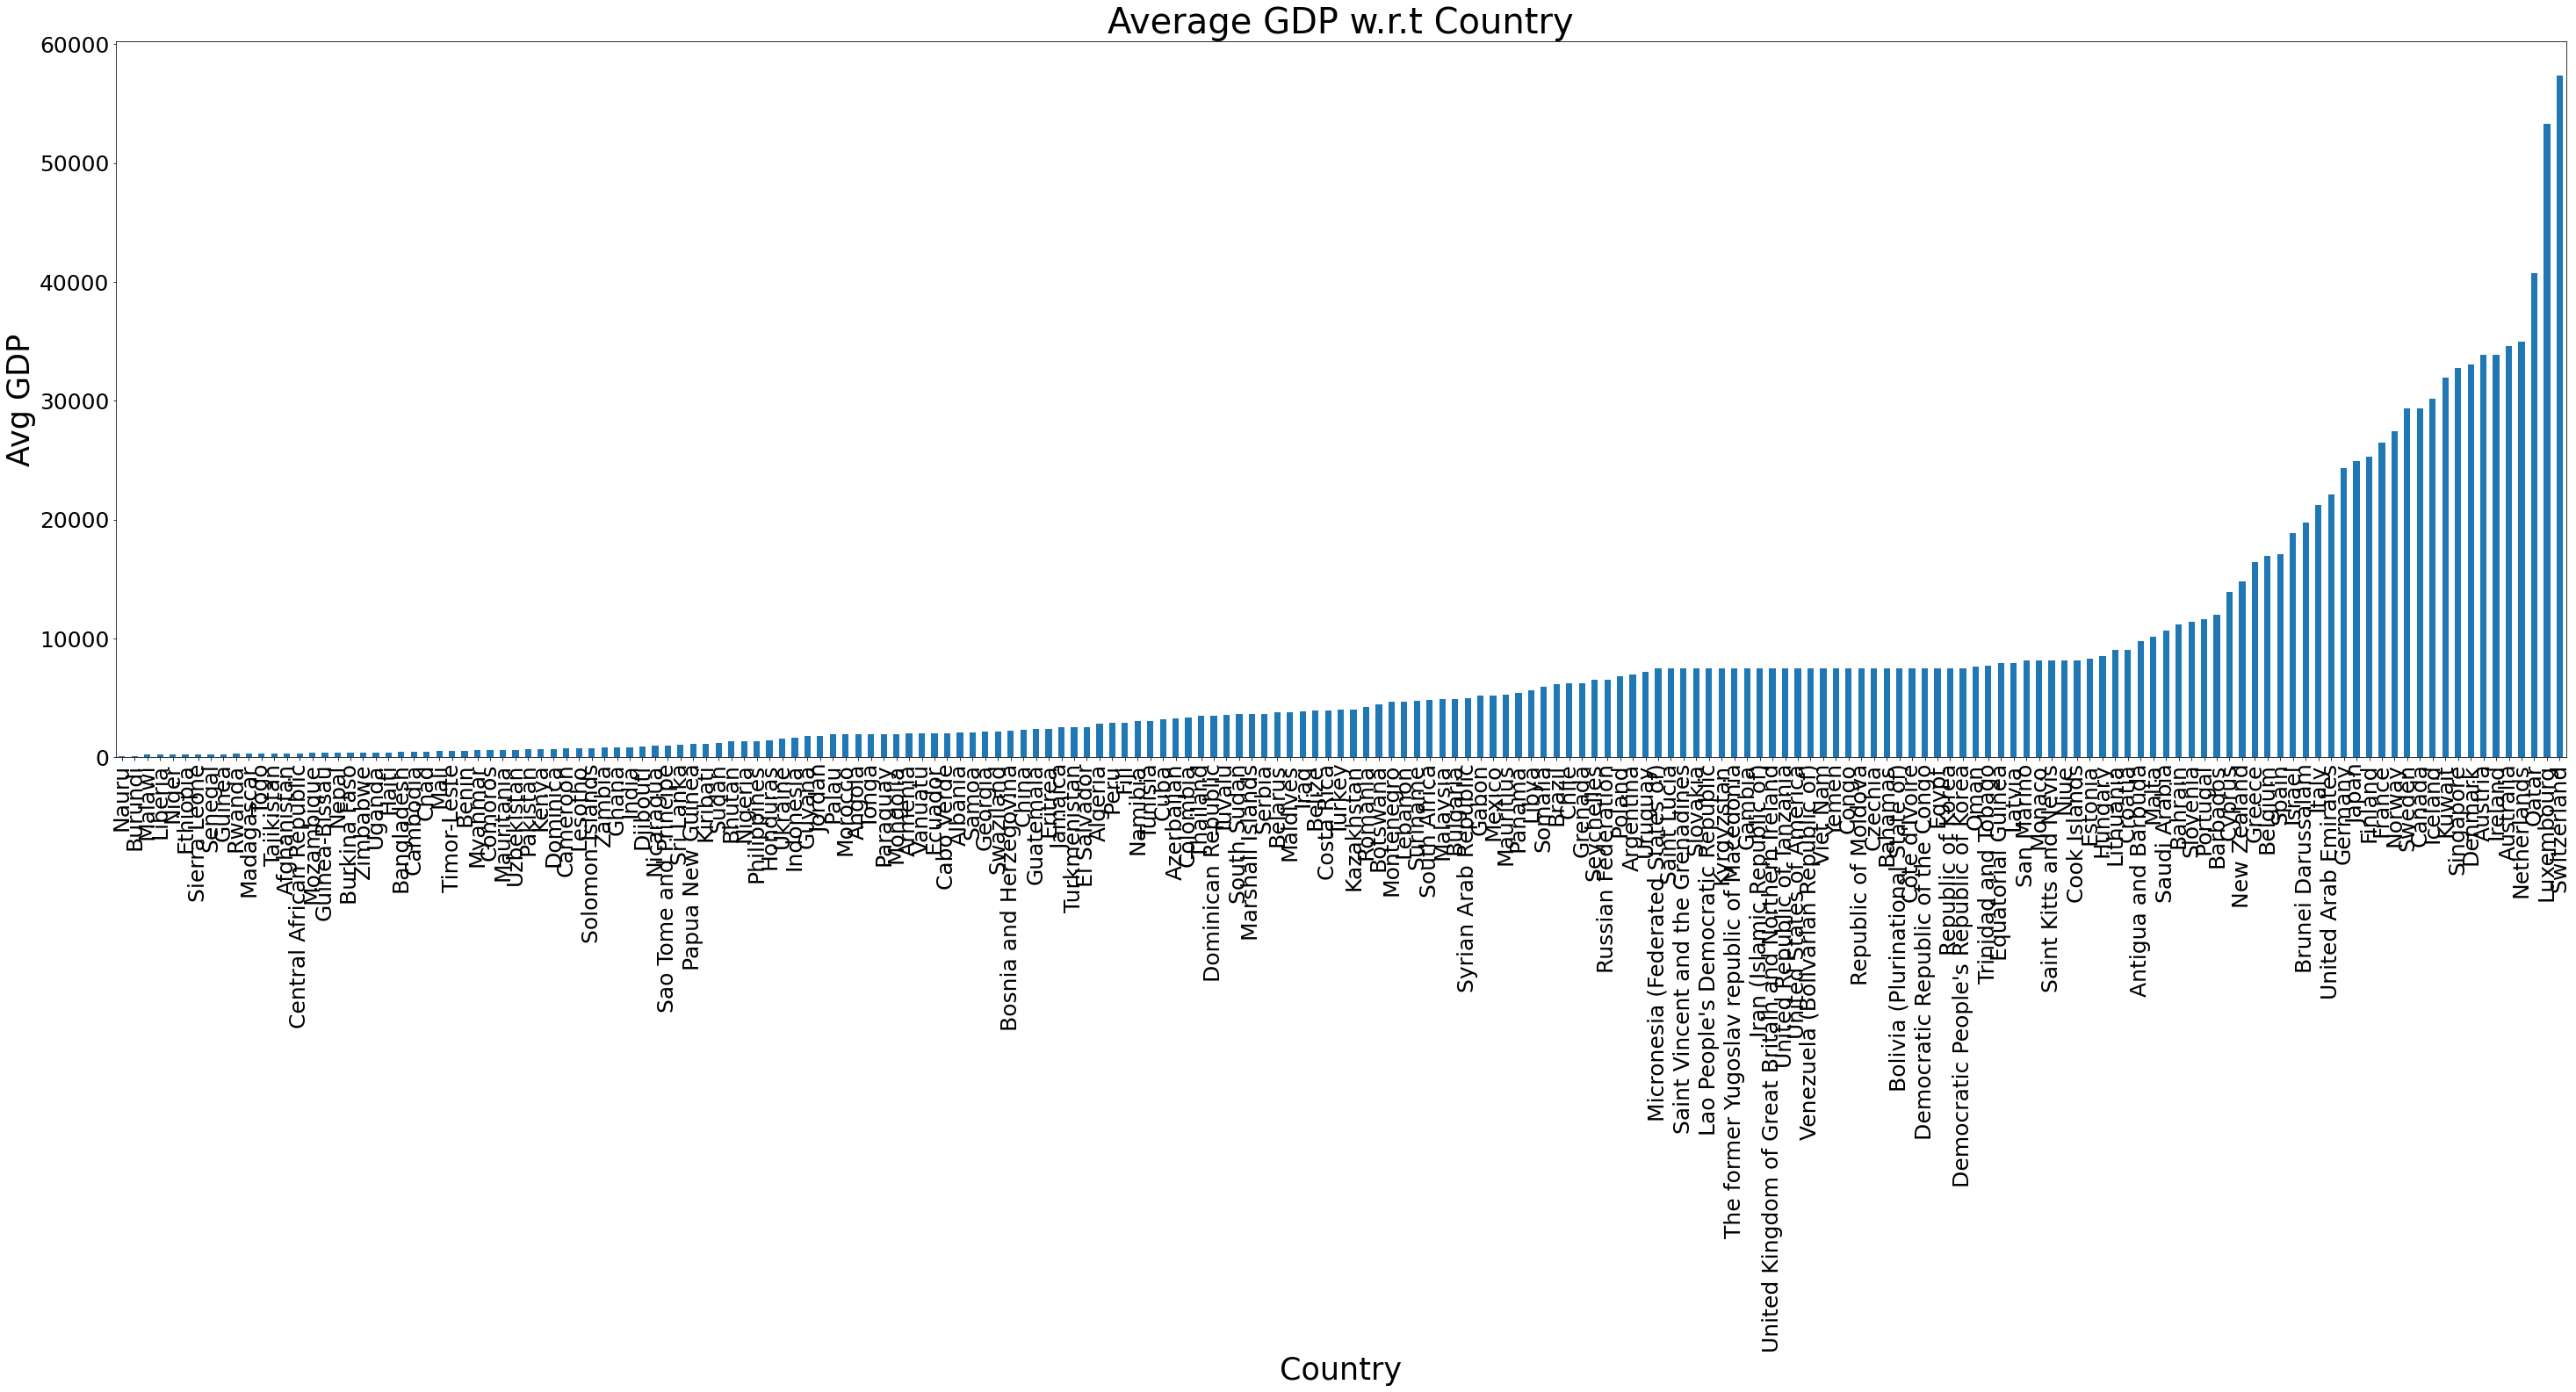

In [26]:
#Bar chart to al countries gdp vs life expectancy
le_country = life.groupby('country')['gdp'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Average GDP w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg GDP",fontsize=35)
plt.show()

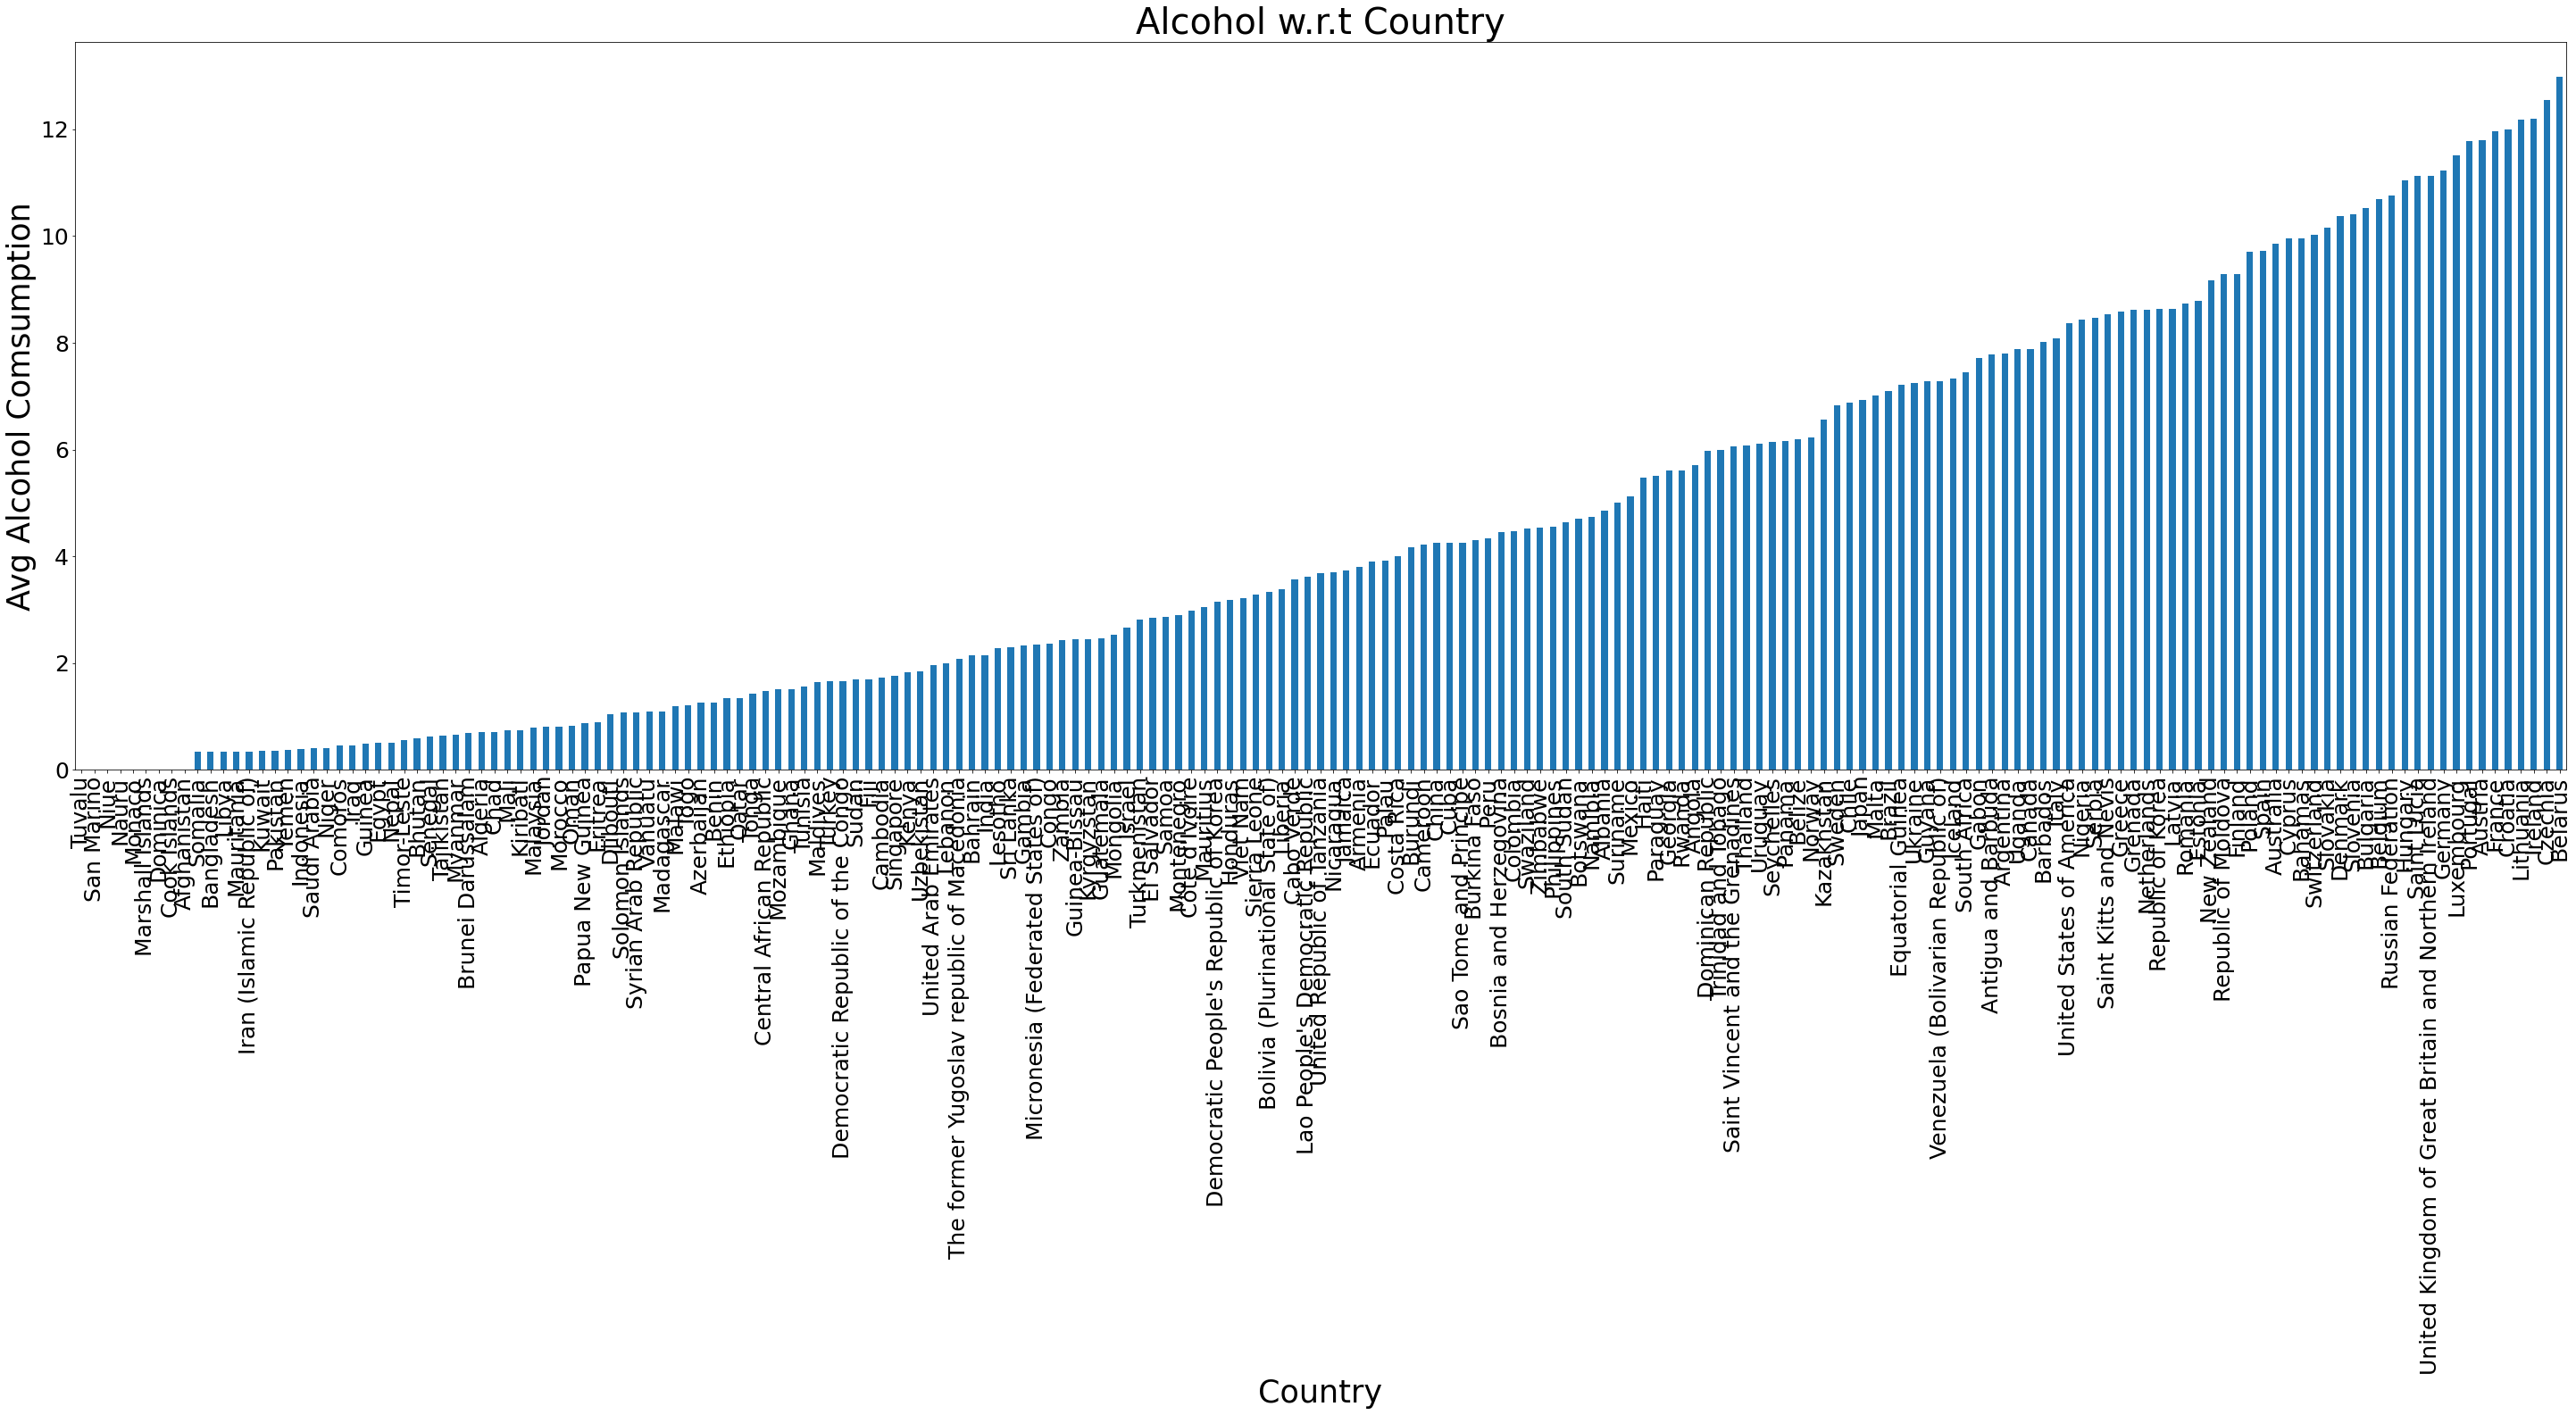

In [27]:
#Bar chart to show alcohol vs life expectancy
le_country = life.groupby('country')['alcohol'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Alcohol w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Alcohol Comsumption",fontsize=35)
plt.show()

In [28]:
#Interpolate na
life.interpolate()
#life.dropna()

,country,year,status,life_expectancy,adult_mortality,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,0.010000,71.279624,65.000000,1154,83.000000,8.16,65.0,0.1,584.259210,3.373649e+07,17.2,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,4.600000,364.975229,99.000000,0,44.844961,6.00,99.0,0.1,3954.227830,2.887300e+04,1.2,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,5.288333,0.000000,95.000000,63,24.000000,7.08,95.0,0.1,4132.762920,3.987153e+07,6.0,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,5.288333,0.000000,64.000000,118,98.000000,7.08,64.0,1.9,3695.793748,2.785935e+06,8.3,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,5.288333,0.000000,99.000000,0,44.844961,7.08,99.0,0.2,13566.954100,1.109741e+07,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,Venezuela (Bolivarian Republic of),2000,Developing,72.5,168.0,8.010000,0.000000,5.000000,22,13.000000,4.91,77.0,0.1,4708.515191,9.440444e+06,1.8,0.670,10.6
2889,Viet Nam,2000,Developing,73.4,139.0,1.600000,0.000000,74.035294,16512,43.000000,4.89,96.0,0.1,4708.515191,9.440444e+06,15.8,0.569,10.4
2905,Yemen,2000,Developing,68.0,252.0,0.070000,0.000000,14.000000,0,66.000000,4.14,74.0,0.1,4708.515191,9.440444e+06,14.1,0.436,7.7
2921,Zambia,2000,Developing,43.8,614.0,2.620000,45.616880,74.035294,30930,72.000000,7.16,85.0,18.7,341.955625,1.531221e+06,7.5,0.418,9.6


In [29]:
#Drop thinness 5-9 as too similar to thinness 1-19, polio similar to diptheria, infant deaths similar to under fives.
#life = life.drop(columns = ['thinness_5-9_years', 'polio', 'infant_deaths'])
#life.head()

In [30]:
life.replace([np.inf, -np.inf], np.nan, inplace=True)

In [31]:
life.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2938 non-null   float64
 4   adult_mortality                  2938 non-null   float64
 5   alcohol                          2938 non-null   float64
 6   percentage_expenditure           2938 non-null   float64
 7   hepatitis_b                      2938 non-null   float64
 8   measles                          2938 non-null   int64  
 9   under-five_deaths                2938 non-null   float64
 10  total_expenditure                2938 non-null   float64
 11  diphtheria                       2938 non-null   float64
 12  hiv/aids            

In [32]:
#life = life.drop(['status'], axis=1)

In [33]:
#life.info()

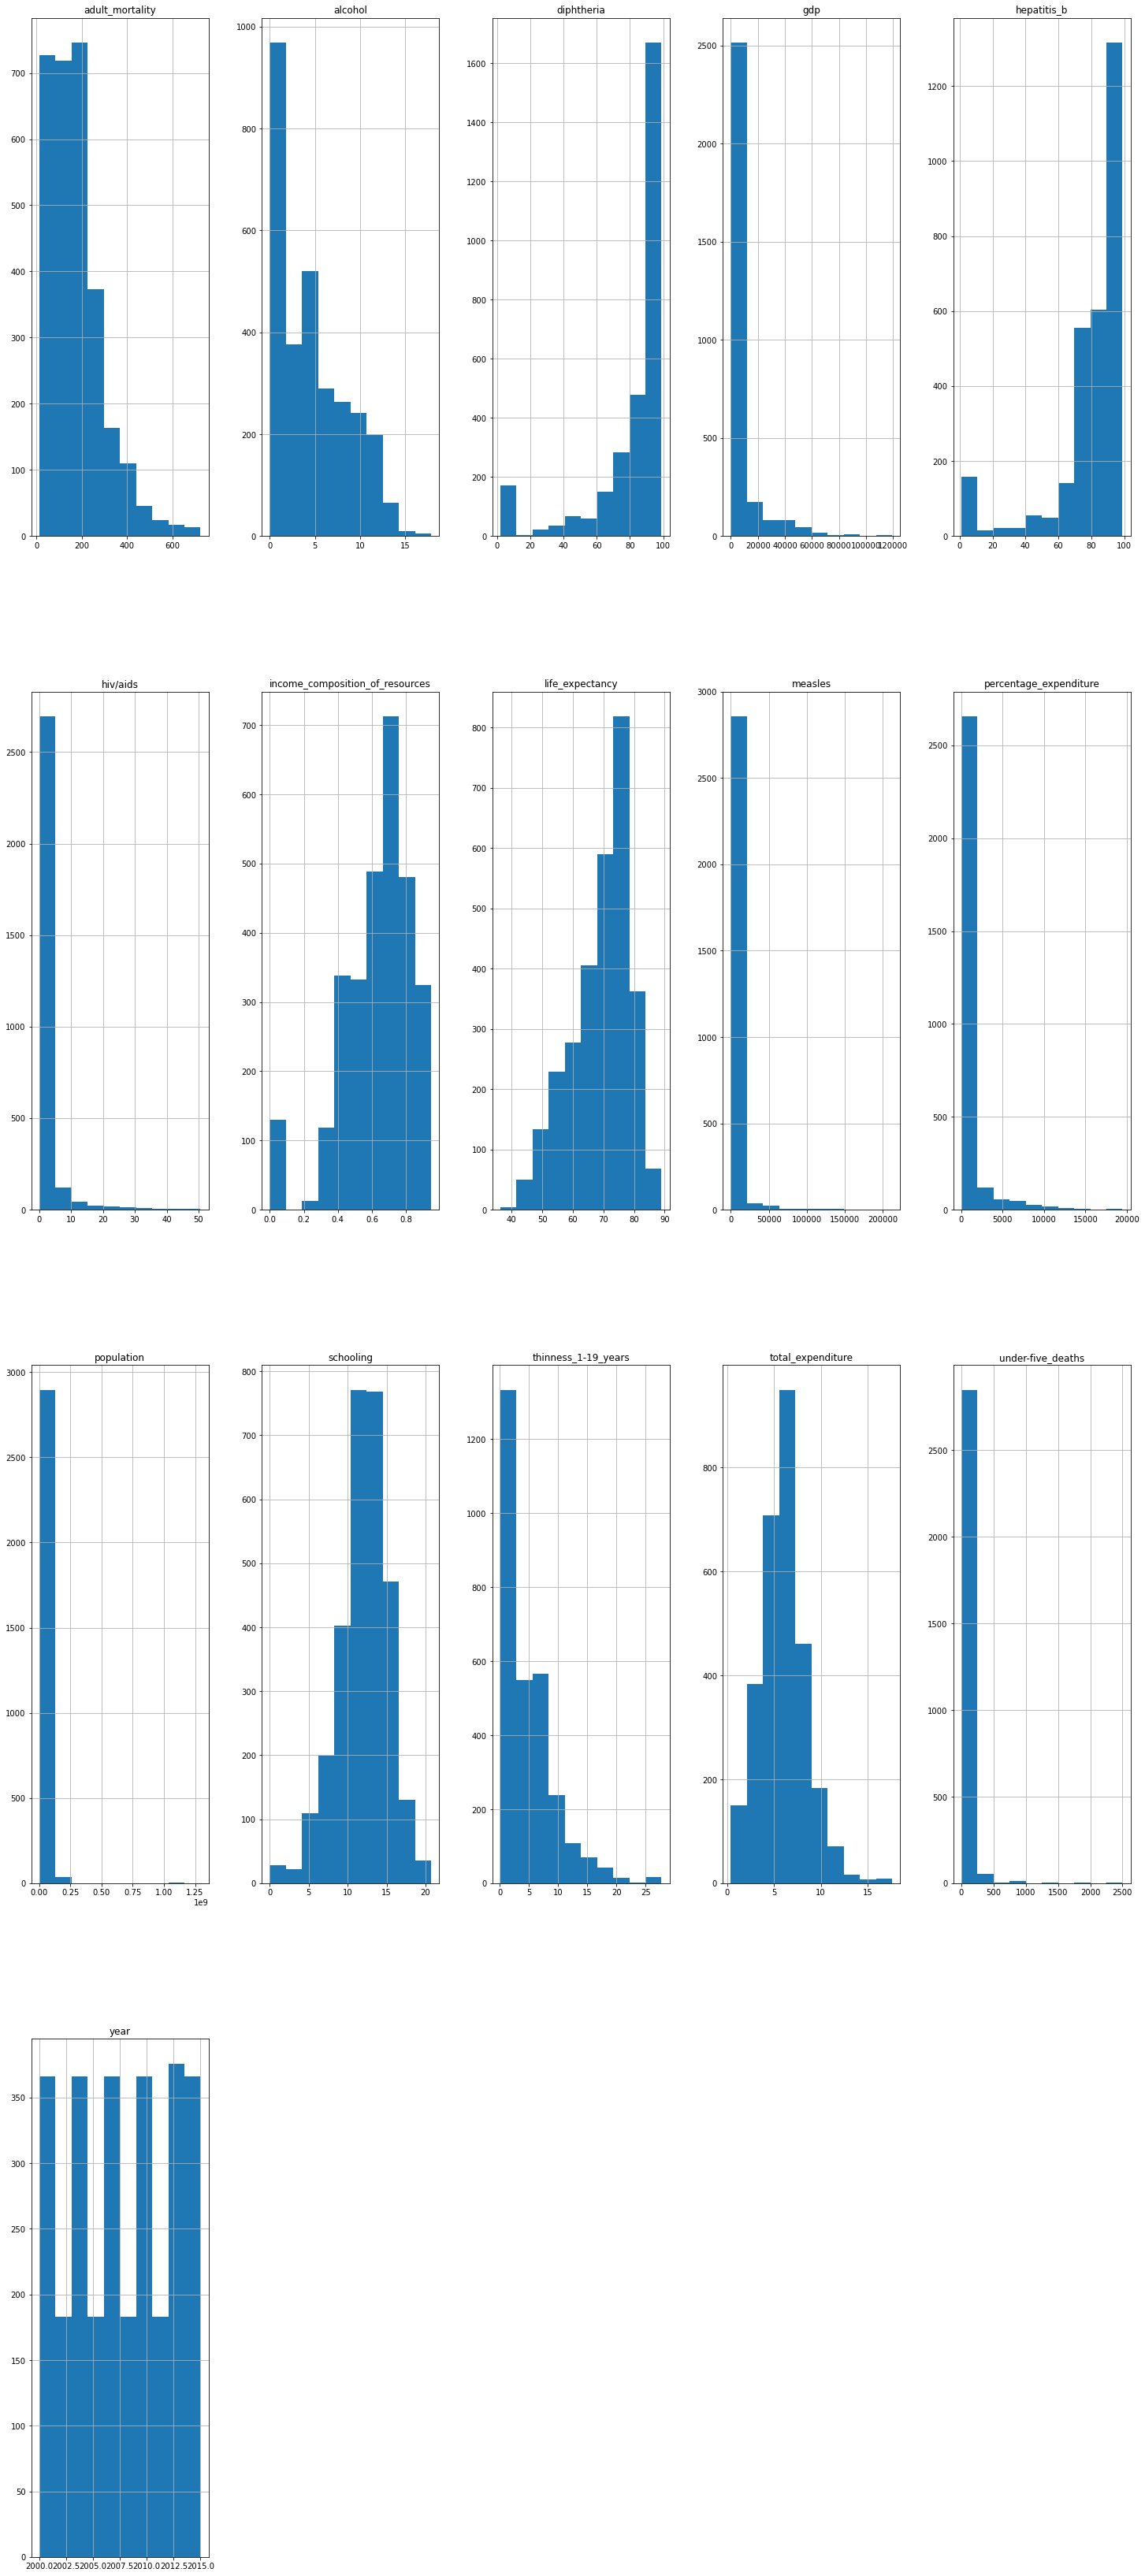

In [34]:
#Bar plots to show life expectancy variables
life.hist(layout =(5,5), figsize =(25,75))
plt.show()

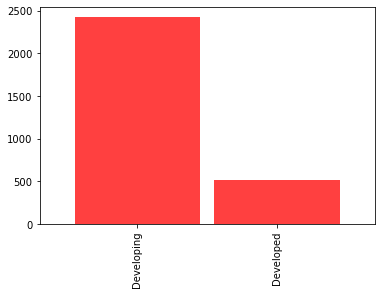

In [35]:
#bar chart to show status distribution  - mainly developing data
life['status'].value_counts().plot.bar(width=0.9,color="red",alpha=0.75)

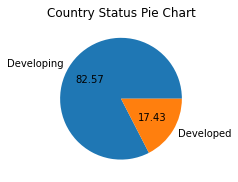

In [36]:
#Country status - in a pie chart that shows datas comes mainly from developing countries 
plt.subplot(122)
life.status.value_counts().plot(kind='pie', autopct='%.2f')
plt.ylabel('')
plt.title('Country Status Pie Chart')

plt.show()

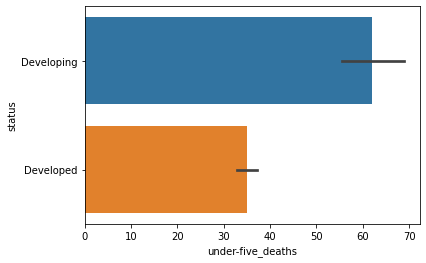

In [37]:
sns.barplot(data=life, x='under-five_deaths',y='status',orient = 'h')

In [38]:
#Mean life expectancy in developed and developing countries
life.groupby('status').life_expectancy.agg(['mean'])

,mean
status,
Developed,79.197852
Developing,67.128467


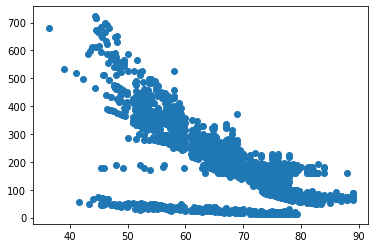

In [39]:
#scatter plot life expectancy and adult mortality negative corralation
plt.scatter(life['life_expectancy'], life ['adult_mortality'])

In [40]:
#Scatter plot to show life expectancy and bmi positive correlation
#plt.scatter(life['life_expectancy'], life['bmi'])

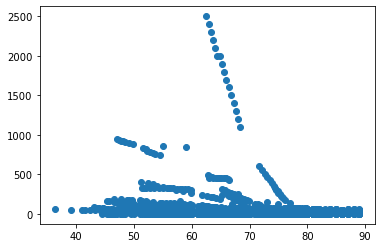

In [41]:
#Scatter plot to show life expectancy and under five deaths negaive correlation
plt.scatter(life['life_expectancy'], life['under-five_deaths'])

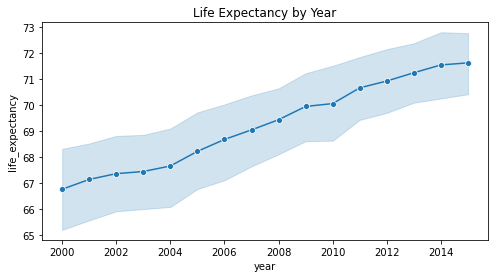

In [42]:
# year vs population_growth - dip in 2013
plt.subplots(figsize=(8,4))
sns.set_palette("rocket")
sns.lineplot('year', 'life_expectancy', data=life, marker='o')
plt.title('Life Expectancy by Year')
plt.show()

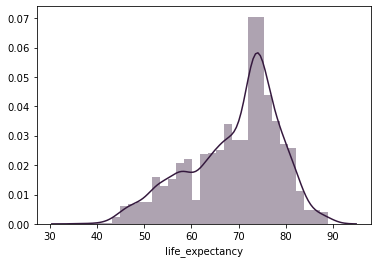

In [43]:
sns.distplot(life['life_expectancy']);

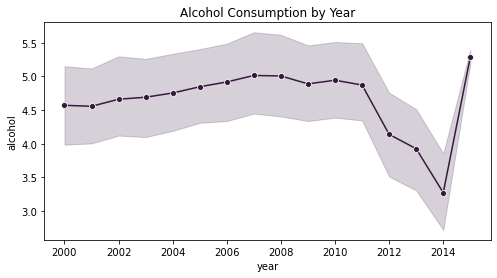

In [44]:
# year vs alcohol_consumption  - dropping from 2011 onwards
plt.subplots(figsize=(8,4))
sns.set_palette("rocket")
sns.lineplot("year","alcohol",data=life,marker="o")
plt.title('Alcohol Consumption by Year')
plt.show()

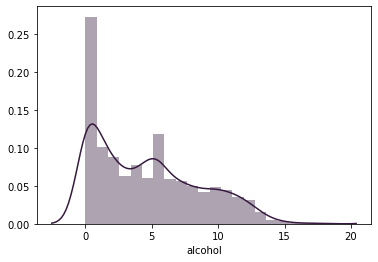

In [45]:
sns.distplot(life['alcohol']);

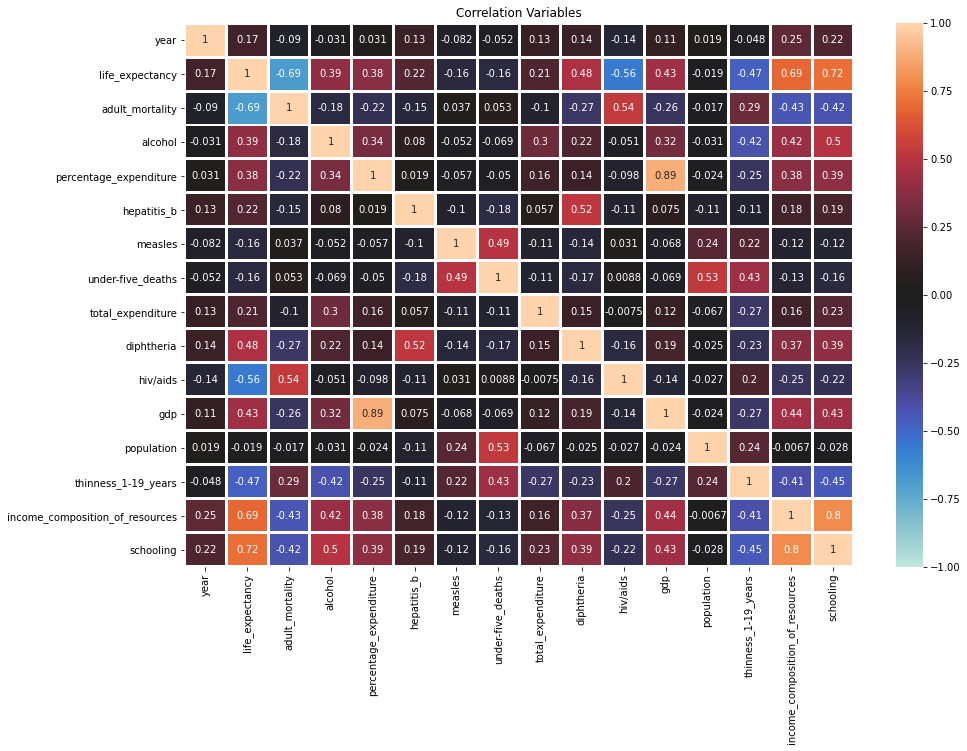

In [46]:
#Matrix corrolation heat map
import seaborn as sns
plt.figure(figsize =(15,10))
cormat = life.corr()
sns.heatmap(cormat, vmin=-1, vmax=1, center =0, annot = True, linewidths = 2)
plt.title ('Correlation Variables')
plt.show()

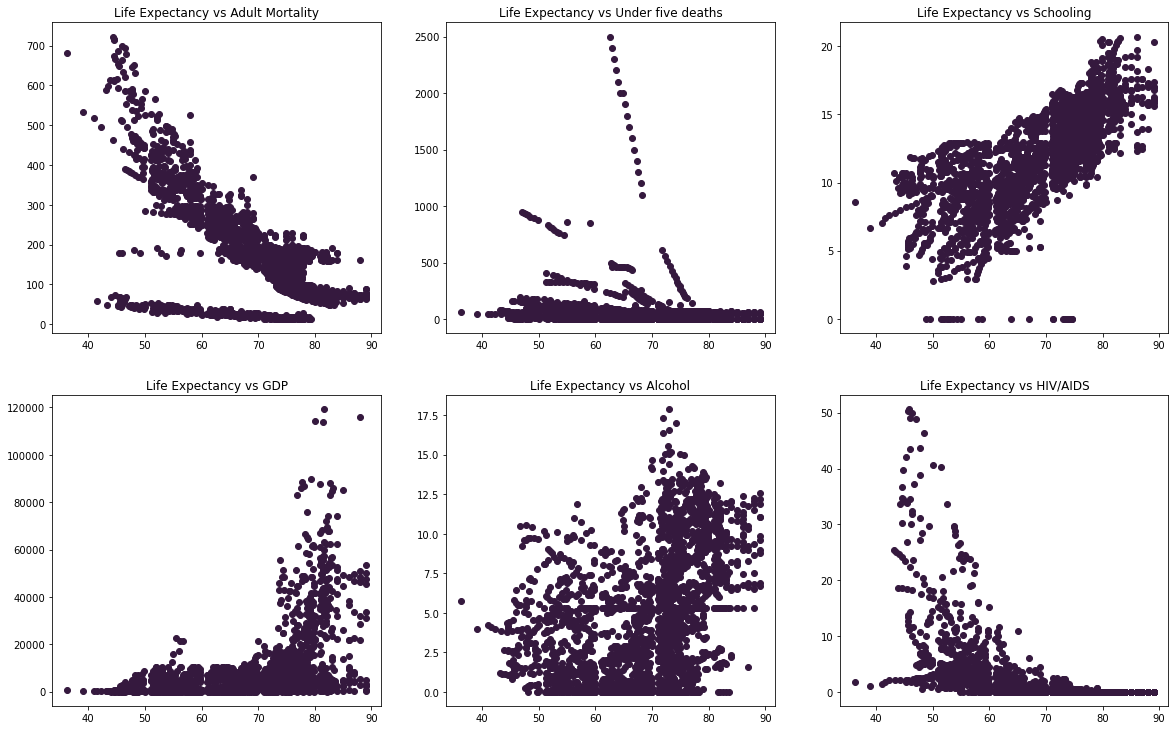

In [47]:
#Scatter plots showing neg correlation life expectancy and adult mortality, pos correlations schooling,
# and income composition of resourses and gdp. 
plt.figure(figsize=(20,40))

plt.subplot(6,3,1)
plt.scatter(life["life_expectancy"], life["adult_mortality"])
plt.title("Life Expectancy vs Adult Mortality")

plt.subplot(6,3,2)
plt.scatter(life["life_expectancy"], life["under-five_deaths"])
plt.title("Life Expectancy vs Under five deaths")

plt.subplot(6,3,3)
plt.scatter(life["life_expectancy"], life["schooling"])
plt.title("Life Expectancy vs Schooling")

plt.subplot(6,3,4)
plt.scatter(life["life_expectancy"], life["gdp"])
plt.title("Life Expectancy vs GDP")

plt.subplot(6,3,5)
plt.scatter(life["life_expectancy"], life["alcohol"])
plt.title("Life Expectancy vs Alcohol")

plt.subplot(6,3,6)
plt.scatter(life["life_expectancy"], life["hiv/aids"])
plt.title("Life Expectancy vs HIV/AIDS")



plt.show()


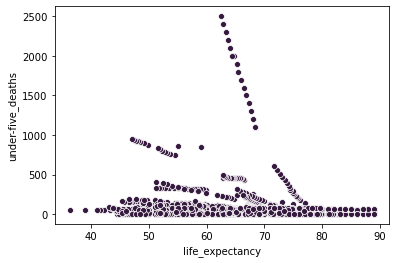

In [48]:
#The heatmap shows a strong corrolation beteen infant deaths and life expectancy
sns.scatterplot(x=life['life_expectancy'],y=life['under-five_deaths']);

In [49]:
#preparing the data for testing
x=life['adult_mortality'].values.reshape(-1,1)
y=life['life_expectancy'].values.reshape(-1,1)


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [52]:
#import linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [53]:
lr.fit(x,y)

LinearRegression()

In [54]:
lr.predict(x_test)

array([[66.37292595],
       [72.19216384],
       [63.463307  ],
       [54.73445015],
       [75.37627514],
       [71.91767149],
       [60.22429723],
       [73.50972714],
       [75.70566597],
       [74.99198585],
       [64.396581  ],
       [66.37292595],
       [76.08995526],
       [74.05871185],
       [75.10178279],
       [77.24282315],
       [76.69383844],
       [74.11361032],
       [69.17274795],
       [62.530033  ],
       [77.95650327],
       [75.59586903],
       [63.13391617],
       [63.79269782],
       [71.36868678],
       [69.77663113],
       [66.75721524],
       [73.94891491],
       [77.46241703],
       [77.13302621],
       [69.99622501],
       [74.7174935 ],
       [56.93038898],
       [59.8949064 ],
       [66.42782442],
       [66.20823053],
       [65.65924583],
       [46.49967955],
       [60.38899264],
       [51.44054191],
       [75.37627514],
       [66.86701218],
       [66.263129  ],
       [77.68201091],
       [71.75297608],
       [77

In [55]:
lr.score(x_test, y_test)

0.4517436097848667

In [56]:
scatter_matrix (life, figsize (10,10))
plt.show()
.

SyntaxError: invalid syntax (<ipython-input-56-060d85cb52e0>, line 3)